<h1><center> DSAI 2201- Winter 2023- Assignment I </center></h1>
<h3><center> Due Date: 13 March 2023 </center></h3>
<h3><center> (50 points total) </center></h3>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name and collaborators:

In [1]:
NAME = "Mary Villanueva"

## Introduction

In Assignments I & II you will go through the entire journey of a small data science project. 
* In **Part I**, you will explore the data and preprocess it.
* In **Part II**, you will apply supervised machine learning models on the same dataset, evaluate its perofrmance, and identify the best models.

In this assignment (Part I), you will analyze the Pima-Indians-Diabetes-Data using Python’s Pandas. The dataset can be downloaded from kaggle (https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download). This dataset consists of several medical predictor (independent) variables and one target (dependent) variable, Outcome. 

The columns of this dataset are as follows:

1. Pregnancies — Number of times pregnant
2. GlucosePlasma — glucose concentration 2 hours in an oral glucose tolerance test
3. Blood Pressure — Diastolic blood pressure (mm Hg)
4. SkinThickness — Triceps skin-fold thickness (mm)
5. Insulin — Two hours of serum insulin (mu U/ml)
6. BMI — Body mass index (weight in kg/(height in m)²)
7. Diabetes Pedigree Function — Diabetes pedigree function
8. Age — Age in years
9. Outcome — Class variable (indicates whether the patient is diabetic or not)

The first eight columns represent the independent variables, and the last column denotes the binary dependent variable. The outcome variable is set to 1 if the patient tested positive for diabetes, and is set to 0 if the patient tested negative for diabetes.

<font color='brown'> For all questions, make sure to provide the code as well as your comments on the results. Points are equally distributed between the code and the explainations provided for each of the results.

There will be an interview regarding your submission and your grade will be based on your performance during the interview.

Make sure this is your own work to get a grade. </font>

Read the data from the .csv file into pandas DataFrame and answer the following questions:

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Question 1: Data Exploration**  _(5 points)_
* A) Analyze the distribution of diabetes (outcome) among the patients. Comment on the results.
* B) Compute descriptive statistics of the data. Comment on the results.
* C) Analyze the skew of medical variables distributions. Comment on the results.


In [4]:
pdSkew = df.Outcome.skew() #using the Pandas skew() function
spSkew = stats.skew(df.Outcome) #using scipy skew() function

print(pdSkew)
print(spSkew)
print(pdSkew == spSkew)

0.635016643444986
0.6337757030614577
False


<p>Using both <i>skew()</i> functions from Pandas and scipy gave me slightly different results. Pandas already uses bias correction, meaning that there is normalization, while scipy does not.</p>

<p>However, both skewness values are near to 1, thus the outcome distribution is <b>positively skewed</b>, or skewed to the right. Since the outcome attribute only has two values, 0 and 1, it could mean that there are more 1s (diabetic) than 0s (non-diabetic) or vice versa. This could make the distribution look skewed, but it does not necessarily mean that there are outliers.</p>

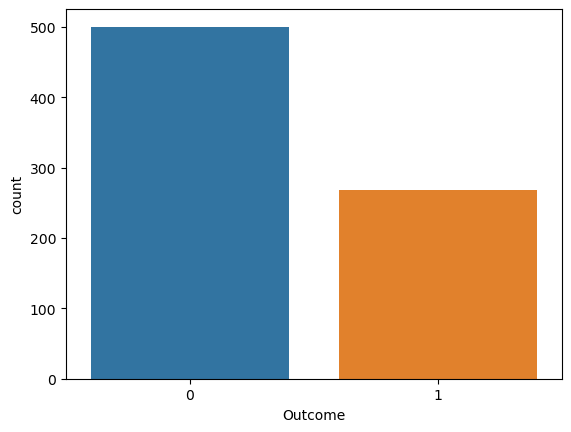

In [5]:
sb.countplot(data = df, x = 'Outcome')
plt.show()

As seen in the countplot, there are more patients who tested negative for diabetes.

In [6]:
df.loc[:, df.columns != 'Outcome'].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


I made the following observations:
<ul>
    <li>All attributes are skewed since their mean =/= median</li>
    <li>Some attributes such as <i>Glucose, BP, Insulin,</i> and <i>BMI</i> have a min. value of 0. These attributes cannot start at 0 so these will be imputated later</li>
</ul>

In [7]:
df.loc[:, ~df.columns.isin(['Outcome', 'Age'])].skew() #exclude the Age column since it is not a medical variable

Pregnancies      0.901674
Glucose          0.173754
BloodPressure   -1.843608
SkinThickness    0.109372
Insulin          2.272251
BMI             -0.428982
DPF              1.919911
dtype: float64

**Blood pressure** and **BMI** attributes have a **negative skewness** while the rest have a **positive skewness**.

**Question 2: Data Visualization- Univariate Analysis**  _(5 points)_
  
  Use univariate plots (histograms and boxplots) to analyze patterns in each of the medical variables with respect to the outcome (diabetes). What categories of patients were most likely to have diabetes? 
  
  

In [8]:
base = sb.color_palette()[6]
base2 = sb.color_palette()[8]

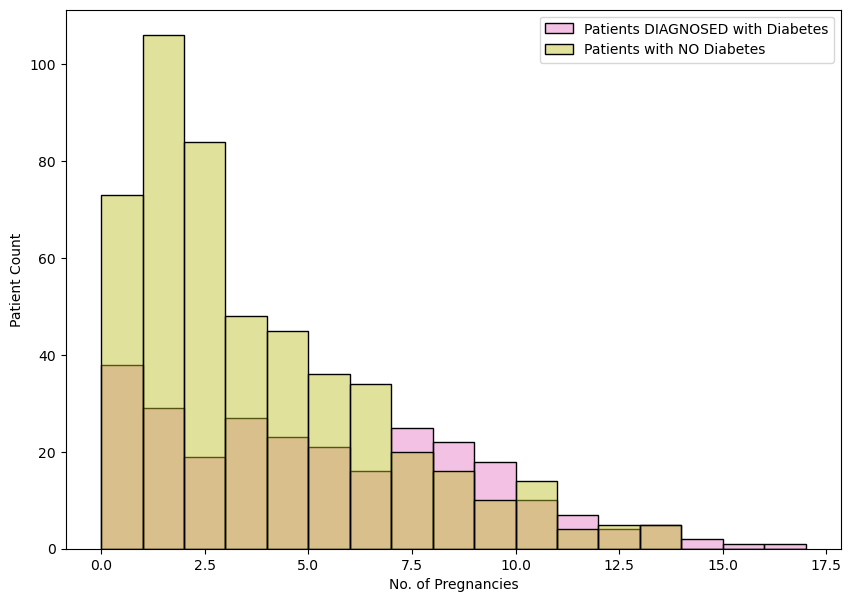

In [9]:
plt.figure(figsize=(10,7))
a = df[df['Outcome'] == 1].Pregnancies
b = df[df['Outcome'] == 0].Pregnancies
bin_edges = np.arange(0, df.Pregnancies.max() + 1, 1)

sb.histplot(a, alpha = 0.45, multiple = 'stack', bins = bin_edges, color = base, label = 'Patients DIAGNOSED with Diabetes')
sb.histplot(b, alpha = 0.45, multiple = 'stack', bins = bin_edges, color = base2, label = 'Patients with NO Diabetes')

plt.xlabel('No. of Pregnancies')
plt.ylabel('Patient Count')
plt.legend()
plt.show()

Based on this histogram, women who increasingly go through pregnancies become more susceptible to having diabetes. 

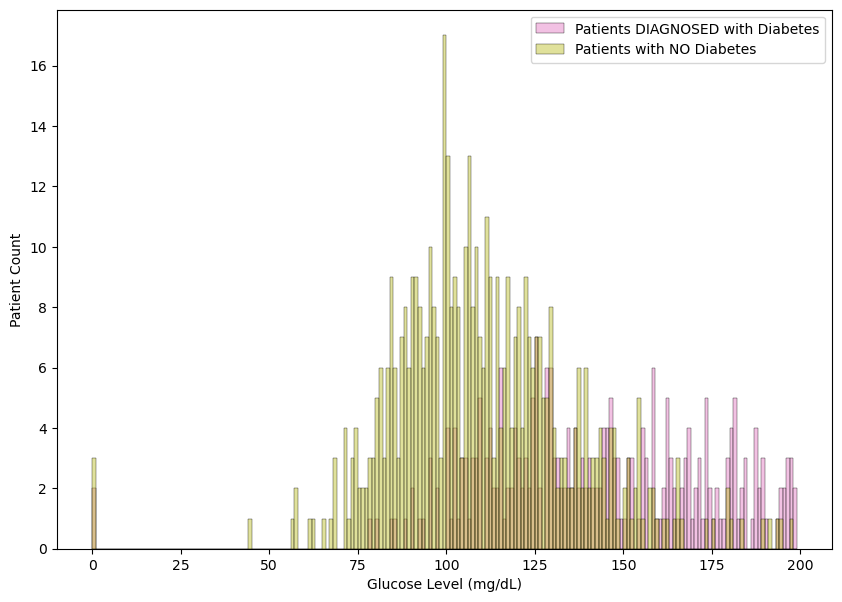

In [10]:
plt.figure(figsize=(10,7))
a = df[df['Outcome'] == 1].Glucose
b = df[df['Outcome'] == 0].Glucose
bin_edges = np.arange(0, df.Glucose.max() + 1, 1)

sb.histplot(a, alpha = 0.45, multiple = 'stack', bins = bin_edges, color = base, label = 'Patients DIAGNOSED with Diabetes')
sb.histplot(b, alpha = 0.45, multiple = 'stack', bins = bin_edges, color = base2, label = 'Patients with NO Diabetes')

plt.xlabel('Glucose Level (mg/dL)')
plt.ylabel('Patient Count')
plt.legend()
plt.show()

Patients who had higher glucose levels (>= 100) are most likely to test positive for diabetes.

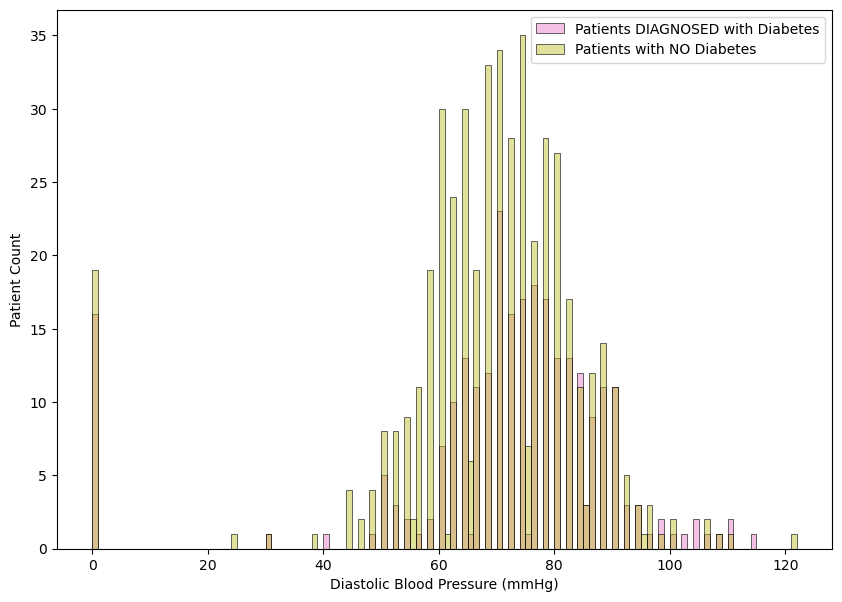

In [11]:
plt.figure(figsize=(10,7))
a = df[df['Outcome'] == 1].BloodPressure
b = df[df['Outcome'] == 0].BloodPressure
bin_edges = np.arange(0, df.BloodPressure.max() + 1, 1)

sb.histplot(a, alpha = 0.45, multiple = 'stack', bins = bin_edges, color = base, label = 'Patients DIAGNOSED with Diabetes')
sb.histplot(b, alpha = 0.45, multiple = 'stack', bins = bin_edges, color = base2, label = 'Patients with NO Diabetes')

plt.xlabel('Diastolic Blood Pressure (mmHg)')
plt.ylabel('Patient Count')
plt.legend()
plt.show()

There is an almost even distribution of diabetic and non-diabetic patients. Diastolic blood pressure alone cannot predict how likely one can have diabetes. 

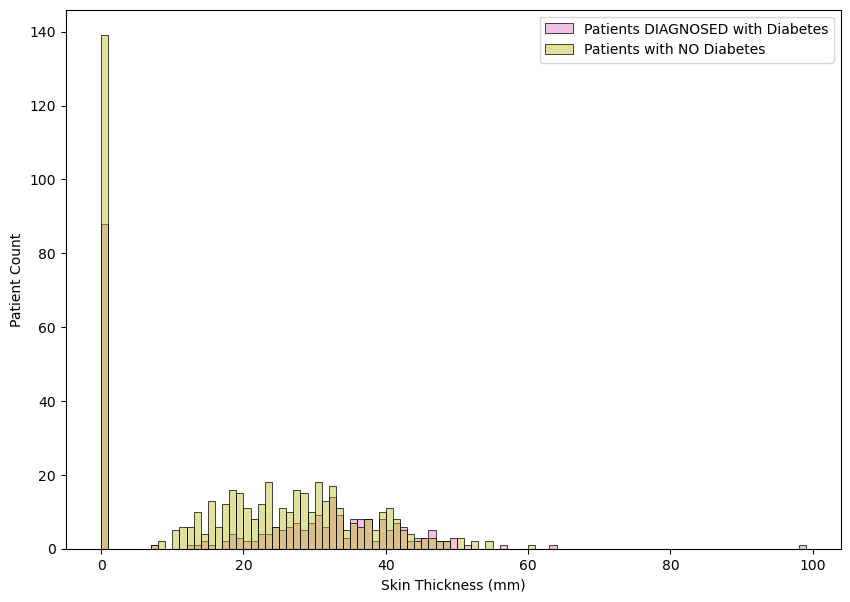

In [12]:
plt.figure(figsize=(10,7))
a = df[df['Outcome'] == 1].SkinThickness
b = df[df['Outcome'] == 0].SkinThickness
bin_edges = np.arange(0, df.SkinThickness.max() + 1, 1)

sb.histplot(a, alpha = 0.45, multiple = 'stack', bins = bin_edges, color = base, label = 'Patients DIAGNOSED with Diabetes')
sb.histplot(b, alpha = 0.45, multiple = 'stack', bins = bin_edges, color = base2, label = 'Patients with NO Diabetes')

plt.xlabel('Skin Thickness (mm)')
plt.ylabel('Patient Count')
plt.legend()
plt.show()

Similarly, the data is evenly distributed here so we cannot determine which patients are more prone to diabetes based on the skin thickness.

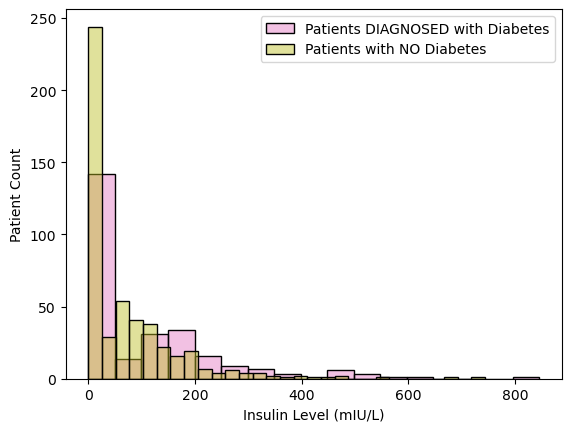

In [13]:
#plt.figure(figsize=(7,7))
a = df[df['Outcome'] == 1].Insulin
b = df[df['Outcome'] == 0].Insulin
#bin_edges = np.arange(0, df.Insulin.max() + 1, 1)

sb.histplot(a, alpha = 0.45, multiple = 'stack', color = base, label = 'Patients DIAGNOSED with Diabetes')
sb.histplot(b, alpha = 0.45, multiple = 'stack', color = base2, label = 'Patients with NO Diabetes')

plt.xlabel('Insulin Level (mIU/L)')
plt.ylabel('Patient Count')
plt.legend()
plt.show()

Diabetic patients are found to have higher levels of insulin.

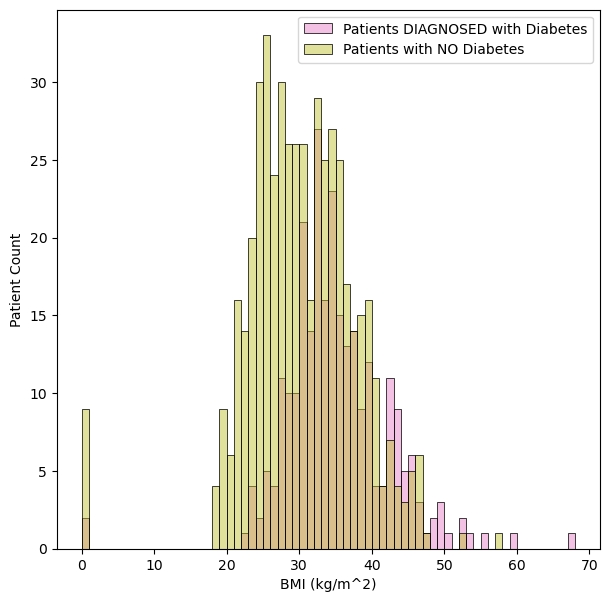

In [14]:
plt.figure(figsize=(7,7))
a = df[df['Outcome'] == 1].BMI
b = df[df['Outcome'] == 0].BMI
bin_edges = np.arange(0, df.BMI.max() + 1, 1)

sb.histplot(a, alpha = 0.45, multiple = 'stack', bins = bin_edges, color = base, label = 'Patients DIAGNOSED with Diabetes')
sb.histplot(b, alpha = 0.45, multiple = 'stack', bins = bin_edges, color = base2, label = 'Patients with NO Diabetes')

plt.xlabel('BMI (kg/m^2)')
plt.ylabel('Patient Count')
plt.legend()
plt.show()

Patients with extreme BMI levels are more likely to be diagnosed with diabetes. Most patients with BMI > 40 are found in the positive (diabetes) group. 

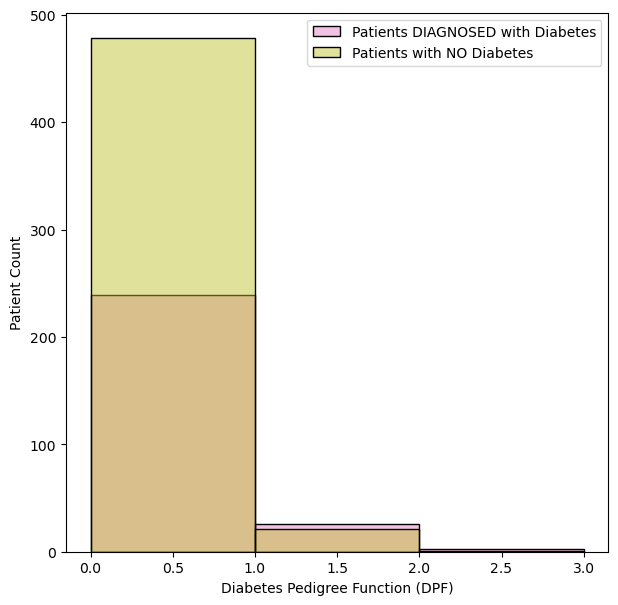

In [15]:
plt.figure(figsize=(7,7))
a = df[df['Outcome'] == 1].DPF
b = df[df['Outcome'] == 0].DPF
bin_edges = np.arange(0, df.DPF.max() + 1, 1)

sb.histplot(a, alpha = 0.45, multiple = 'stack', bins = bin_edges, color = base, label = 'Patients DIAGNOSED with Diabetes')
sb.histplot(b, alpha = 0.45, multiple = 'stack', bins = bin_edges, color = base2, label = 'Patients with NO Diabetes')

plt.xlabel('Diabetes Pedigree Function (DPF)')
plt.ylabel('Patient Count')
plt.legend()
plt.show()

Based on the histogram, diabetic patients are found to have a higher DPF. 

**Question 3: Data Visualization- Multivariate Analysis**  _(10 points)_

Use multivariate plots (correlation matrix plot and scatter plot) to:
   * A) Analyze correlations between medical variables. Comment on the results  
   * B) Identify potential factors that can predict diabetes in women (outcome). Comment on the results.


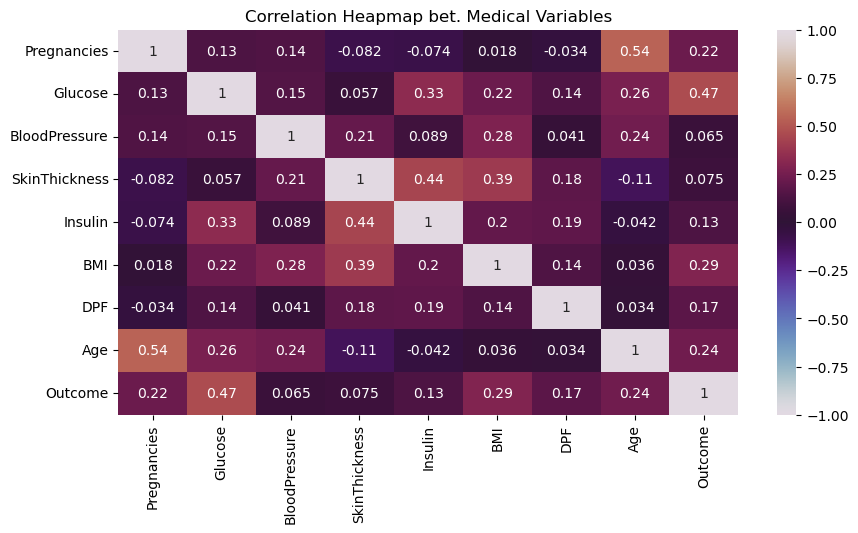

In [16]:
plt.figure(figsize=(10,5))
heatmap = sb.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, cmap = 'twilight')
heatmap.set_title('Correlation Heapmap bet. Medical Variables')
plt.show()

For question <b>3A</b>:
<ul>
    <li>Pregnancies attribute has a small positive correlation with glucose and blood pressure.</li>
    <li>Glucose has a positive correlation with insulin, BMI, and DPF.</li>
    <li>Blood pressure has a positive correlation with skin thickness and BMI.</li>
    <li>Skin thickness has a positive correlation with insulin, BMI, and DPF</li>
    <li>Insulin has a positive correlation with BMI and DPF.</li>
    <li>BMI has a positive correlation with DPF.</li>
</ul>

For question <b>3B</b>:
<ul>
    <li>I noticed that <b>age</b>, <b>glucose</b>, <b>insulin</b>, <b>BMI</b>, <b>pregnancies</b>, and <b>DPF</b> have a <b>POSITIVE CORRELATION</b> with the outcome. These attributes can potentially predict diabetes in women since the higher these values are, the larger the risk for diabetes.</li>
    <li>Additionally, the glucose attribute has the highest positive correlation with the outcome.</li>
    <li>But this data set has not undergone data cleaning yet, so there might several outliers that are affecting the correlation values.</li>
</ul>

**Question 4: Data Cleaning**  _(5 points)_

Identify and remove any outliers in the medical variables. Explain the rationale for identifying and removing outliers.

Identifying outliers is crucial to prevent bias. Even more important, we have to refine our data by ensuring that it is free of outliers so that our outcomes will not be distorted. Furthermore, removing outliers will help create a more accurate model that can correctly predict outcomes.

In [17]:
def find(col, name):
    q1 = col.quantile(.25)
    q3 = col.quantile(.75)
    iqr = q3 - q1
    
    upper = q3 + 1.5*iqr 
    lower = q1 - 1.5*iqr
    
    outliers = []
    
    for x in col.values:
        if x > upper or x < lower:
            outliers.append(x)
    
    print(f"{name} column outliers: {outliers}\n")
            
    return outliers

In [18]:
outliers = {}

for col in df.loc[:, ~df.columns.isin(['Age', 'Outcome'])]:
    outliers[col] = find(df[col], col) #store them in a dictionary to access them for removal later

Pregnancies column outliers: [15, 17, 14, 14]

Glucose column outliers: [0, 0, 0, 0, 0]

BloodPressure column outliers: [0, 0, 30, 110, 0, 0, 0, 0, 108, 122, 30, 0, 110, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 108, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 0, 24, 0, 0, 0, 0, 114, 0, 0, 0]

SkinThickness column outliers: [99]

Insulin column outliers: [543, 846, 342, 495, 325, 485, 495, 478, 744, 370, 680, 402, 375, 545, 360, 325, 465, 325, 415, 579, 474, 328, 480, 326, 330, 600, 321, 440, 540, 480, 335, 387, 392, 510]

BMI column outliers: [0.0, 0.0, 0.0, 0.0, 53.2, 55.0, 0.0, 67.1, 52.3, 52.3, 52.9, 0.0, 0.0, 59.4, 0.0, 0.0, 57.3, 0.0, 0.0]

DPF column outliers: [2.288, 1.441, 1.39, 1.893, 1.781, 1.222, 1.4, 1.321, 1.224, 2.329, 1.318, 1.213, 1.353, 1.224, 1.391, 1.476, 2.137, 1.731, 1.268, 1.6, 2.42, 1.251, 1.699, 1.258, 1.282, 1.698, 1.461, 1.292, 1.394]



In [19]:
df_copy = df.copy()

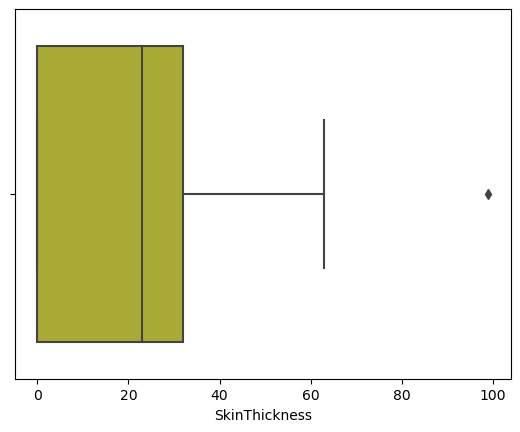

In [20]:
sb.boxplot(data = df, x = 'SkinThickness', color = base2);

In [21]:
df_copy = df.loc[~df['SkinThickness'].isin([99, 0])] #drop row where skin thickness is 99 or 0

In [22]:
find(df_copy['SkinThickness'], 'SkinThickness') #check if attribute still has outliers

SkinThickness column outliers: [60, 63]



[60, 63]

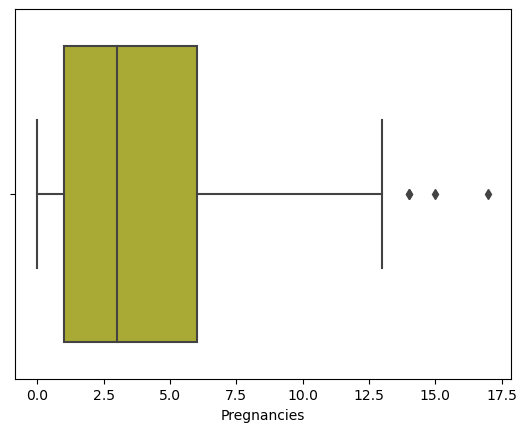

In [23]:
sb.boxplot(data = df, x = 'Pregnancies', color = base2);

I did not remove the outliers in the *Pregnancies* column since these values can naturally occur. 

In [24]:
for x in outliers['Pregnancies']:
    print(df.loc[df.Pregnancies == x,:][['Pregnancies', 'Age']])

    Pregnancies  Age
88           15   43
     Pregnancies  Age
159           17   47
     Pregnancies  Age
298           14   46
455           14   38
     Pregnancies  Age
298           14   46
455           14   38


The outliers in the pregnancies column can occur naturally since the ages align with the number of times pregnant. If the age and pregnancy attributes seem inconsistent, then I would have to consider dropping the record. 

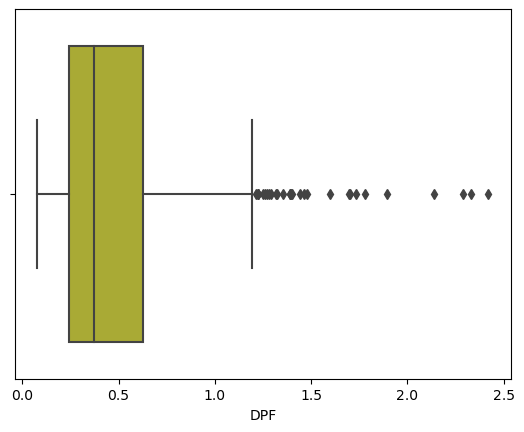

In [25]:
sb.boxplot(data = df, x = 'DPF', color = base2);

DPF normally ranges from 0 to 2.5, so the following outliers are not really erroneous. But to lessen the skewness of the distribution, I will cap the values to 1.00. 

In [26]:
df_copy['DPF'] = df_copy['DPF'].clip(upper=1.000)

C:\Users\mary6\AppData\Local\Temp\ipykernel_12504\2854247155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['DPF'] = df_copy['DPF'].clip(upper=1.000)


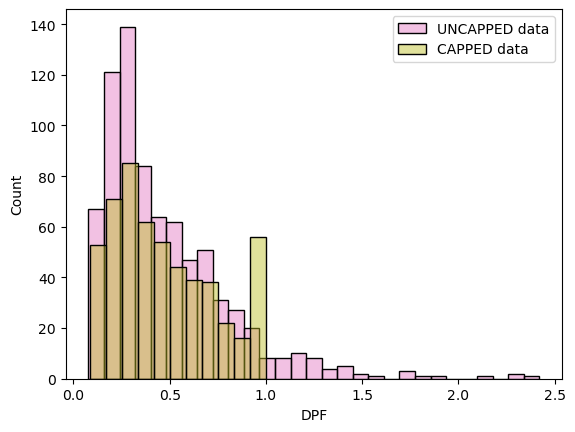

In [27]:
sb.histplot(data = df, x = 'DPF', color = base, multiple = 'stack', alpha = 0.45, label = 'UNCAPPED data');
sb.histplot(data = df_copy, x = 'DPF', color = base2, multiple = 'stack', alpha = 0.45, label = 'CAPPED data');

plt.legend();

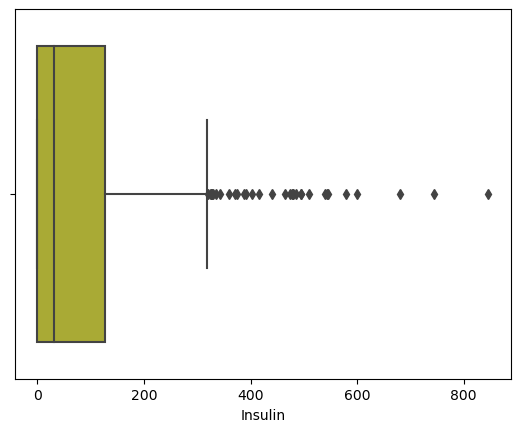

In [28]:
sb.boxplot(data = df, x = 'Insulin', color = base2);

Extreme insulin levels can happen (hyperinsulinemia). Since these extreme values can still provide insight, I am keeping them in the data set. Instead of deleting them altogether, I will **cap** the values to minimize skewness of the data. 

In [29]:
df_copy['Insulin'] = df_copy['Insulin'].clip(upper=150)

C:\Users\mary6\AppData\Local\Temp\ipykernel_12504\2740359840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Insulin'] = df_copy['Insulin'].clip(upper=150)


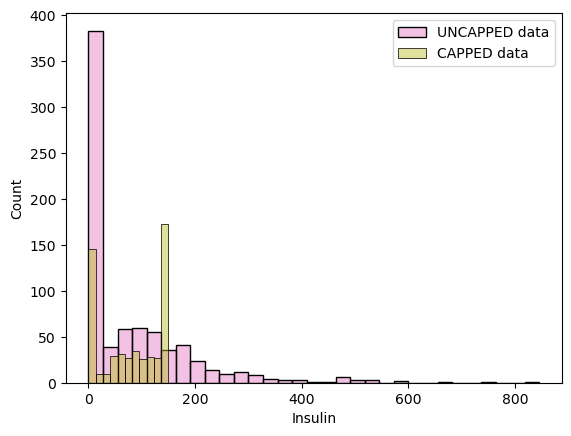

In [30]:
sb.histplot(data = df, x = 'Insulin', color = base, multiple = 'stack', alpha = 0.45, label = 'UNCAPPED data');
sb.histplot(data = df_copy, x = 'Insulin', color = base2, multiple = 'stack', alpha = 0.45, label = 'CAPPED data');

plt.legend();

**Question 5: Data Imputation**  _(5 points)_

Doctors know that the range of Glucose, Insulin, BMI, and blood pressure can never start from Zero. However, the dataset includes many zero records for these medical variables. Use appropriate methods to impute these zero records and provide a detailed explanation in the comments.


In [31]:
#Glucose
gl_avg = int(df.Glucose.median()) 
df_copy['Glucose'] = df_copy['Glucose'].replace(0,gl_avg) #replace all 0 values in the given column with the median

#Insulin
ins_avg = int(df.Insulin.median())
df_copy['Insulin'] = df_copy['Insulin'].replace(0,ins_avg)

#BMI
bmi_avg = int(df.BMI.median())
df_copy['BMI'] = df_copy['BMI'].replace(0,bmi_avg)

#Blood pressure
bp_avg = int(df.BloodPressure.median())
df_copy['BloodPressure'] = df_copy['BloodPressure'].replace(0,bp_avg)

#I used median values to replace the zero records because it is least likely to be affected by outliers

C:\Users\mary6\AppData\Local\Temp\ipykernel_12504\3996441167.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Glucose'] = df_copy['Glucose'].replace(0,gl_avg) #replace all 0 values in the given column with the median
C:\Users\mary6\AppData\Local\Temp\ipykernel_12504\3996441167.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Insulin'] = df_copy['Insulin'].replace(0,ins_avg)
C:\Users\mary6\AppData\Local\Temp\ipykernel_12504\3996441167.py:11: SettingWithCopyWarning: 
A value is trying 

In [32]:
#check for 0 records in the following columns again:
find(df_copy['Glucose'], 'Glucose')
find(df_copy['Insulin'], 'Insulin')
find(df_copy['BMI'], 'BMI')
find(df_copy['BloodPressure'], 'BloodPressure')

Glucose column outliers: []

Insulin column outliers: []

BMI column outliers: [53.2, 55.0, 67.1, 52.3, 59.4, 57.3]

BloodPressure column outliers: [30, 110, 30, 110, 108, 110, 24, 38, 106, 106]



[30, 110, 30, 110, 108, 110, 24, 38, 106, 106]

Before moving on to normalization, I will also create new features based on *Insulin*, *BMI*, and *Glucose* attributes:

In [33]:
def ins(df):
    x = df.Insulin
    
    if x < 60:
        return 'Normal'
    elif x >= 60 and x <= 140:
        return 'Prediabetes' #high
    elif x > 140:
        return 'Diabetes' #very high
    
df_copy['InsulinLevel'] = df_copy.apply(ins, axis = 1) #create a new column BMILevel that indicates the patient's BMI range based on their BMI
df_copy

C:\Users\mary6\AppData\Local\Temp\ipykernel_12504\2171923246.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['InsulinLevel'] = df_copy.apply(ins, axis = 1) #create a new column BMILevel that indicates the patient's BMI range based on their BMI


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome,InsulinLevel
0,6,148,72,35,30,33.6,0.627,50,1,Normal
1,1,85,66,29,30,26.6,0.351,31,0,Normal
3,1,89,66,23,94,28.1,0.167,21,0,Prediabetes
4,0,137,40,35,150,43.1,1.000,33,1,Diabetes
6,3,78,50,32,88,31.0,0.248,26,1,Prediabetes
...,...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,30,44.0,0.403,43,1,Normal
763,10,101,76,48,150,32.9,0.171,63,0,Diabetes
764,2,122,70,27,30,36.8,0.340,27,0,Normal
765,5,121,72,23,112,26.2,0.245,30,0,Prediabetes


In [34]:
def gluc(df):
    x = df.Glucose
    
    if x < 63:
        return 'Hypoglycemic'
    elif x >= 63 and x <= 99:
        return 'Normal'
    elif x > 99:
        return 'Hyperglycemic'
    
df_copy['GlucoseLevel'] = df_copy.apply(gluc, axis = 1) 
df_copy

C:\Users\mary6\AppData\Local\Temp\ipykernel_12504\1286735759.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['GlucoseLevel'] = df_copy.apply(gluc, axis = 1)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome,InsulinLevel,GlucoseLevel
0,6,148,72,35,30,33.6,0.627,50,1,Normal,Hyperglycemic
1,1,85,66,29,30,26.6,0.351,31,0,Normal,Normal
3,1,89,66,23,94,28.1,0.167,21,0,Prediabetes,Normal
4,0,137,40,35,150,43.1,1.000,33,1,Diabetes,Hyperglycemic
6,3,78,50,32,88,31.0,0.248,26,1,Prediabetes,Normal
...,...,...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,30,44.0,0.403,43,1,Normal,Hyperglycemic
763,10,101,76,48,150,32.9,0.171,63,0,Diabetes,Hyperglycemic
764,2,122,70,27,30,36.8,0.340,27,0,Normal,Hyperglycemic
765,5,121,72,23,112,26.2,0.245,30,0,Prediabetes,Hyperglycemic


Similarly, I will also create a new attribute called *BMIRange* based on the *BMI* column instead of deleting the outliers. Based on the heatmap earlier, BMI is positively correlated with diabetes, so higher values above 50 can indicate extreme obesity which can be a driving factor of diabetes. Also, creating a categorical type column will make it easier to interpret BMI levels.

In [35]:
def bmi(df):
    if df.BMI < 18.5:
        return 'Underweight'
    elif df.BMI >= 18.5 and df.BMI <= 24.9:
        return 'Healthy'
    elif df.BMI >= 25 and df.BMI <= 29.9:
        return 'Overweight'
    elif df.BMI > 30:
        return 'Obese'
    
df_copy['BMILevel'] = df_copy.apply(bmi, axis = 1) 
df_copy

C:\Users\mary6\AppData\Local\Temp\ipykernel_12504\818356194.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['BMILevel'] = df_copy.apply(bmi, axis = 1)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome,InsulinLevel,GlucoseLevel,BMILevel
0,6,148,72,35,30,33.6,0.627,50,1,Normal,Hyperglycemic,Obese
1,1,85,66,29,30,26.6,0.351,31,0,Normal,Normal,Overweight
3,1,89,66,23,94,28.1,0.167,21,0,Prediabetes,Normal,Overweight
4,0,137,40,35,150,43.1,1.000,33,1,Diabetes,Hyperglycemic,Obese
6,3,78,50,32,88,31.0,0.248,26,1,Prediabetes,Normal,Obese
...,...,...,...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,30,44.0,0.403,43,1,Normal,Hyperglycemic,Obese
763,10,101,76,48,150,32.9,0.171,63,0,Diabetes,Hyperglycemic,Obese
764,2,122,70,27,30,36.8,0.340,27,0,Normal,Hyperglycemic,Obese
765,5,121,72,23,112,26.2,0.245,30,0,Prediabetes,Hyperglycemic,Overweight


For the remaining *BloodPressure* outliers, I will only be removing values that are < 100 (30, 24, and 38) since these are extremely low and unrealistic. It might be entered or measured incorrectly. 

In [36]:
df_copy = df_copy.loc[~df_copy['BloodPressure'].isin([30, 24, 38])]

In [37]:
find(df_copy['BloodPressure'], 'BloodPressure')

BloodPressure column outliers: [110, 110, 108, 110, 106, 106]



[110, 110, 108, 110, 106, 106]

I want to create another feature that combines *Insulin* and *Glucose* since both insulin and glucose are found to have a positive correlation with the outcome (diabetes). Adding this feature can further predict diabetes.

In [38]:
df_copy['GIProduct'] = df_copy['Insulin'] * df_copy['Glucose'] 
df_copy

C:\Users\mary6\AppData\Local\Temp\ipykernel_12504\3729315427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['GIProduct'] = df_copy['Insulin'] * df_copy['Glucose']


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome,InsulinLevel,GlucoseLevel,BMILevel,GIProduct
0,6,148,72,35,30,33.6,0.627,50,1,Normal,Hyperglycemic,Obese,4440
1,1,85,66,29,30,26.6,0.351,31,0,Normal,Normal,Overweight,2550
3,1,89,66,23,94,28.1,0.167,21,0,Prediabetes,Normal,Overweight,8366
4,0,137,40,35,150,43.1,1.000,33,1,Diabetes,Hyperglycemic,Obese,20550
6,3,78,50,32,88,31.0,0.248,26,1,Prediabetes,Normal,Obese,6864
...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,30,44.0,0.403,43,1,Normal,Hyperglycemic,Obese,5100
763,10,101,76,48,150,32.9,0.171,63,0,Diabetes,Hyperglycemic,Obese,15150
764,2,122,70,27,30,36.8,0.340,27,0,Normal,Hyperglycemic,Obese,3660
765,5,121,72,23,112,26.2,0.245,30,0,Prediabetes,Hyperglycemic,Overweight,13552


I will also create a feature called *DiabetesRisk* which combines the *Age* and *DPF* columns. This feature takes the product of the two attributes and predicts the possibility of diabetes according to the patient's age and family history.

In [39]:
df_copy['DiabetesRisk'] = df_copy['Age'] * df_copy['DPF']
df_copy

C:\Users\mary6\AppData\Local\Temp\ipykernel_12504\2759095384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['DiabetesRisk'] = df_copy['Age'] * df_copy['DPF']


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome,InsulinLevel,GlucoseLevel,BMILevel,GIProduct,DiabetesRisk
0,6,148,72,35,30,33.6,0.627,50,1,Normal,Hyperglycemic,Obese,4440,31.350
1,1,85,66,29,30,26.6,0.351,31,0,Normal,Normal,Overweight,2550,10.881
3,1,89,66,23,94,28.1,0.167,21,0,Prediabetes,Normal,Overweight,8366,3.507
4,0,137,40,35,150,43.1,1.000,33,1,Diabetes,Hyperglycemic,Obese,20550,33.000
6,3,78,50,32,88,31.0,0.248,26,1,Prediabetes,Normal,Obese,6864,6.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,30,44.0,0.403,43,1,Normal,Hyperglycemic,Obese,5100,17.329
763,10,101,76,48,150,32.9,0.171,63,0,Diabetes,Hyperglycemic,Obese,15150,10.773
764,2,122,70,27,30,36.8,0.340,27,0,Normal,Hyperglycemic,Obese,3660,9.180
765,5,121,72,23,112,26.2,0.245,30,0,Prediabetes,Hyperglycemic,Overweight,13552,7.350


**Question 6: Data Scaling**  _(5 points)_

Do you need to use any data scaling techniques on the medical variables of this dataset? Explain your answer.

In [40]:
df_copy.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
DPF              float64
Age                int64
Outcome            int64
InsulinLevel      object
GlucoseLevel      object
BMILevel          object
GIProduct          int64
DiabetesRisk     float64
dtype: object

All variables except *Outcome*, *InsulinLevel*, *BMILevel*, and *GlucoseLevel* (*Outcome* is numerical but I don't need to normalize it since its values are binary - 1 or 0) are numerical so I have to normalize them. Numerical data that are on varying scales have to be normalized to prevent bias in the data set.

In [41]:
cols = ['Outcome', 'InsulinLevel', 'GlucoseLevel', 'BMILevel']

x = df_copy.loc[:, ~df_copy.columns.isin(cols)]

df_copy.loc[:, ~df_copy.columns.isin(cols)] = (x-x.min()) / (x.max()-x.min())

df_copy

C:\Users\mary6\AppData\Local\Temp\ipykernel_12504\2849666850.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.loc[:, ~df_copy.columns.isin(cols)] = (x-x.min()) / (x.max()-x.min())


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome,InsulinLevel,GlucoseLevel,BMILevel,GIProduct,DiabetesRisk
0,0.352941,0.643357,0.457143,0.500000,0.117647,0.314928,0.592350,0.483333,1,Normal,Hyperglycemic,Obese,0.119247,0.525209
1,0.058824,0.202797,0.371429,0.392857,0.117647,0.171779,0.290710,0.166667,0,Normal,Normal,Overweight,0.053347,0.160538
3,0.058824,0.230769,0.371429,0.285714,0.588235,0.202454,0.089617,0.000000,0,Prediabetes,Normal,Overweight,0.256137,0.029164
4,0.000000,0.566434,0.000000,0.500000,1.000000,0.509202,1.000000,0.200000,1,Diabetes,Hyperglycemic,Obese,0.680962,0.554605
6,0.176471,0.153846,0.142857,0.446429,0.544118,0.261759,0.178142,0.083333,1,Prediabetes,Normal,Obese,0.203766,0.081561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,0.529412,0.797203,0.485714,0.428571,0.117647,0.527607,0.347541,0.366667,1,Normal,Hyperglycemic,Obese,0.142259,0.275414
763,0.588235,0.314685,0.514286,0.732143,1.000000,0.300613,0.093989,0.700000,0,Diabetes,Hyperglycemic,Obese,0.492678,0.158614
764,0.117647,0.461538,0.428571,0.357143,0.117647,0.380368,0.278689,0.100000,0,Normal,Hyperglycemic,Obese,0.092050,0.130233
765,0.294118,0.454545,0.457143,0.285714,0.720588,0.163599,0.174863,0.150000,0,Prediabetes,Hyperglycemic,Overweight,0.436960,0.097631


In [42]:
df_copy = df_copy.drop('Outcome', axis=1).assign(Outcome=df_copy['Outcome'])

df_copy

#i only moved the outcome column to the end of the dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,InsulinLevel,GlucoseLevel,BMILevel,GIProduct,DiabetesRisk,Outcome
0,0.352941,0.643357,0.457143,0.500000,0.117647,0.314928,0.592350,0.483333,Normal,Hyperglycemic,Obese,0.119247,0.525209,1
1,0.058824,0.202797,0.371429,0.392857,0.117647,0.171779,0.290710,0.166667,Normal,Normal,Overweight,0.053347,0.160538,0
3,0.058824,0.230769,0.371429,0.285714,0.588235,0.202454,0.089617,0.000000,Prediabetes,Normal,Overweight,0.256137,0.029164,0
4,0.000000,0.566434,0.000000,0.500000,1.000000,0.509202,1.000000,0.200000,Diabetes,Hyperglycemic,Obese,0.680962,0.554605,1
6,0.176471,0.153846,0.142857,0.446429,0.544118,0.261759,0.178142,0.083333,Prediabetes,Normal,Obese,0.203766,0.081561,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,0.529412,0.797203,0.485714,0.428571,0.117647,0.527607,0.347541,0.366667,Normal,Hyperglycemic,Obese,0.142259,0.275414,1
763,0.588235,0.314685,0.514286,0.732143,1.000000,0.300613,0.093989,0.700000,Diabetes,Hyperglycemic,Obese,0.492678,0.158614,0
764,0.117647,0.461538,0.428571,0.357143,0.117647,0.380368,0.278689,0.100000,Normal,Hyperglycemic,Obese,0.092050,0.130233,0
765,0.294118,0.454545,0.457143,0.285714,0.720588,0.163599,0.174863,0.150000,Prediabetes,Hyperglycemic,Overweight,0.436960,0.097631,0


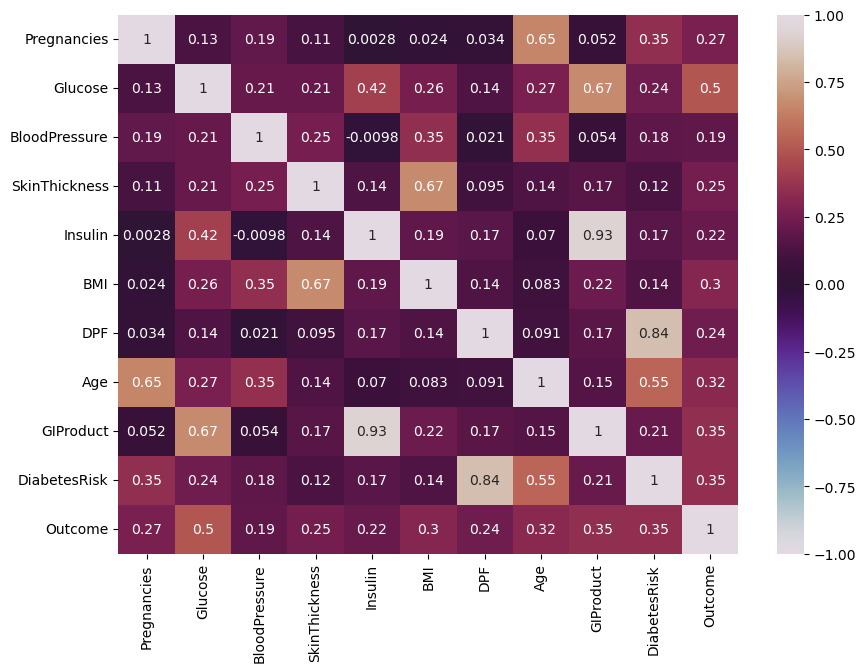

In [43]:
plt.figure(figsize = (10,7));
sb.heatmap(df_copy.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'twilight');

#create a new heatmap based on dataframe copy

As a result of data cleaning, some of the correlation values changed. Among the attributes, *Glucose* still has the highest positive correlation with diabetes. Both the *GIProduct* and *DiabetesRisk* features have the same (positive) correlation value.

**Question 7: Feature Engineering**  _(15 points)_
* A) Did you engineer any attributes (created new attributes)? If yes, explain the rationale and how the new attributes were used in the analysis?
* B) If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded.

I created *InsulinLevel*, *GlucoseLevel*, and *BMILevel* attributes so that it'll be easier to interpret their corresponding numerical features.

I also created *GIProduct*, which is a feature that represents the likelihood of getting diabetes based on the patient's overall insulin and glucose levels. The higher the value, the higher the risk. <br>

Similar to the first feature, I also created *DiabetesRisk* which takes into account the patient's age and diabetes pedigree function. This attribute predicts the outcome based on how old the patient is along with their family history of diabetes. The patient is more likekly to have diabetes if they have a higher value. <br>

I did not exclude any attributes since they are all positively associated with the outcome. All attributes somehow contribute to the prediction of diabetes, but at varying degrees (some have higher correlation values than the others).